# Statistics notebook for behavioral data

This notebook accompanies the manuscript:

Oosterwijk, Snoek, Rotteveel, Barrett, & Scholte. (submitted). *Shared states: Using MVPA to test neural overlap between self-focused emotion imagery and other-focused emotion understanding.*

It describes how the descriptive and inferential statistics reported in the manuscript have been calculated.
It also shows how plots have been created.

Author: Lukas Snoek, lukassnoek@gmail.com

In [76]:
import numpy as np
import pandas as pd
import os
import os.path as op
import glob
from scipy.stats import f_oneway, ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.stats import pearsonr

%matplotlib inline
sns.set_style("whitegrid")

### Descriptive statistics for age/sex

In [2]:
home = '/home/lukas/Dropbox/PhD_projects/DecodingEmotions_SCAN/Behavioral_data'
plot_dir = op.join(op.dirname(home), 'Plots')
demographics_file = op.join(home, 'demographics.csv')
demogr = pd.read_csv(demographics_file, sep=',')

m_age = demogr['age'].mean()
std_age = demogr['age'].std()
number_female = np.sum([g == 'F' for g in demogr['gender']])
print('Mean age: %f, std age: %f' % (m_age, std_age))
print('Proportion female: %f' % number_female)

Mean age: 21.476190, std age: 1.749830
Proportion female: 14.000000


### Descriptive/inferential statistics and visualizations of success rates
This section describes how the statistics for the success rate (i.e. how successful subjects were in performing both the self- and other-focused task) were calculated.

In [4]:
validation_file = op.join(home, 'validation_behav.csv')
val_data = pd.read_csv(validation_file, sep=',')

# val_data is in 'wide' format, but for seaborn-style plots, we need a long format
vars_t.o_melt = ['suc_other_act', 'suc_other_int', 'suc_other_sit', 'suc_self_act', 'suc_self_int', 'suc_self_sit']
df_long = pd.melt(val_data, id_vars=['sub_name'], value_vars=vars_to_melt)
df_long['condition'] = ['sefrom matplotlib.gridspec import GridSpec
lf' if 'self' in c else 'other' for c in df_long['variable']]

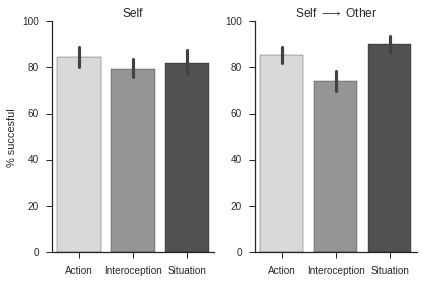

In [63]:
# Plot bargraphs of succes rates
sns.set_style('ticks')

ax1 = plt.subplot(121)
sns.barplot(x='variable', y='value', data=df_long[df_long['condition']=='self'], palette='Greys')
ax1.set_ylabel('% succesful'), ax1.set_xlabel('')
ax1.set_xticklabels(['Action', 'Interoception', 'Situation'])
ax1.set_title('Self')
ax2 = plt.subplot(122, sharex=ax1, sharey=ax1)
sns.barplot(x='variable', y='value', data=df_long[df_long['condition']=='other'], palette='Greys')
ax2.set_ylabel(''), ax2.set_xlabel('')
ax2.set_xticklabels(['Action', 'Interoception', 'Situation'])
ax2.set_title('Self $\longrightarrow$ Other')
plt.tight_layout()from matplotlib.gridspec import GridSpec

sns.despine()
plt.savefig(op.join(plot_dir, 'success.png'), dpi=800).

Below, an F-test is performed for both the self- and other-success rates.
Following the F-test, pairwise comparisons are calculated.

In [36]:
n = val_data.shape[0]
k = 3 # i.e. 3 conditions (act, int, sit)
df1 = k - 1
df2 = n - k 

print('F-tests')
fval, pval = f_oneway(val_data['suc_self_act'], val_data['suc_self_int'], val_data['suc_self_sit'])
print('Self-data: F(%i, %i) = %f, p = %f' % (df1, df2, fval, pval))

fval, pval = f_oneway(val_data['suc_other_act'], val_data['suc_other_int'], val_data['suc_other_sit'])
print('Other-data: F(%i, %i) = %f, p = %f' % (df1, df2, fval, pval))

print('\nPairwise comparisons')
tval_si, pval_si = ttest_rel(val_data['suc_other_sit'], val_data['suc_other_int'])
print('Other sit-int: t(%i) = %f, p = %f)' % (n-1, tval_si, pval_si))

tval_sa, pval_sa = ttest_ind(val_data['suc_other_sit'], val_data['suc_other_act'])
print('Other sit-act: t(%i) = %f, p = %f)' % (n-1, tval_sa, pval_sa))

tval_ai, pval_ai = ttest_ind(val_data['suc_other_act'], val_data['suc_other_int'])
print('Other act-int: t(%i) = %f, p = %f)' % (n-1, tval_ai, pval_ai))
print('\nDescriptive statistics')

descr_stats = pd.DataFrame()
descr_stats['mean'] = val_data[['suc_other_act', 'suc_other_int', 'suc_other_sit']].mean()
descr_stats['se'] = val_data[['suc_other_act', 'suc_other_int', 'suc_other_sit']].std() / np.sqrt(n)
print(descr_stats)

F-tests
Self-data: F(2, 17) = 1.031114, p = 0.363164
Other-data: F(2, 17) = 17.740571, p = 0.000001

Pairwise comparisons
Other sit-int: t(19) = 6.838803, p = 0.000002)
Other sit-act: t(19) = 1.689760, p = 0.099263)
Other act-int: t(19) = 4.110041, p = 0.000203)

Descriptive statistics
               mean        se
suc_other_act  85.5  1.846048
suc_other_int  74.0  2.102630
suc_other_sit  90.0  1.919430


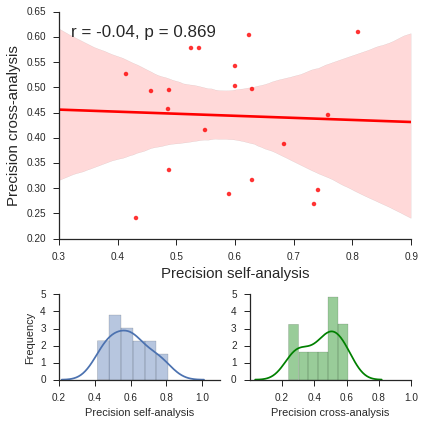

In [85]:
prec, recall = val_data.self_precision, val_data.cross_precision

gs = GridSpec(3, 2)
plt.figure(figsize=(6, 6))
sns.set_style('ticks')
plt.subplot(gs[0:2, 0:2])
sns.regplot(prec, recall, color='red')
r, p = pearsonr(prec, recall)
plt.text(0.32, 0.6, 'r = %.2f, p = %.3f' % (r, p), fontsize=17)
plt.xlabel('Precision self-analysis', fontsize=15)
plt.ylabel('Precision cross-analysis', fontsize=15)

plt.subplot(gs[2, 0])
sns.distplot(val_data.self_precision, bins=6)
plt.xlabel('Precision self-analysis')
plt.ylabel('Frequency')
plt.xticks(np.arange(0.2, 1.2, 0.2))
plt.yticks(np.arange(0, 6, 1))

plt.subplot(gs[2, 1])
sns.distplot(val_data.cross_precision, bins=6, color='green')
plt.xlabel('Precision cross-analysis')
plt.xticks(np.arange(0.2, 1.2, 0.2))

sns.despine()
plt.tight_layout()
plt.savefig(op.join(plot_dir, 'self_cross_relation.png'), dpi=600)